In [5]:
import pandas as pd

In [6]:
main = pd.read_csv('FinalDataset1.csv')

In [7]:
main.head()

,datetime,open,high,low,close,tick_volume,CPI_month_tag,CPI_Actual,CPI_Forecast,CPI_Previous,...,InterestRate_Forecast,InterestRate_Previous,PPI_month_tag,PPI_Actual,PPI_Forecast,PPI_Previous,PCE_month_tag,PCE_Actual,PCE_Forecast,PCE_Previous
0,2018-01-02 01:00:00,1302.96,1306.30,1302.26,1306.23,2497,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02 01:30:00,1306.22,1307.68,1306.14,1306.79,2325,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02 02:00:00,1306.79,1306.88,1305.27,1305.90,2214,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-02 02:30:00,1305.91,1307.30,1305.89,1306.34,2686,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-02 03:00:00,1306.33,1306.46,1304.23,1306.26,4656,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
volumeData = main[['datetime', 'tick_volume']]
volumeData.head()

,datetime,tick_volume
0,2018-01-02 01:00:00,2497
1,2018-01-02 01:30:00,2325
2,2018-01-02 02:00:00,2214
3,2018-01-02 02:30:00,2686
4,2018-01-02 03:00:00,4656


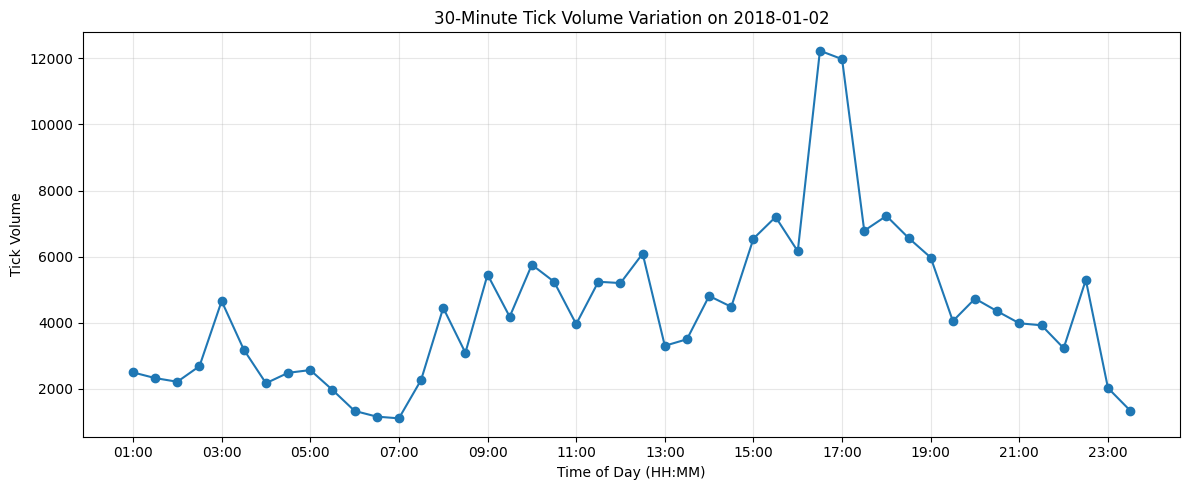

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Read your CSV (adjust filename/path if needed)
volumeData = pd.read_csv('FinalDataset1.csv', parse_dates=['datetime'])

# 2) Filter to just 2018-01-02
#    Ensure “datetime” is a datetime dtype:
volumeData['datetime'] = pd.to_datetime(volumeData['datetime'])
day_mask = volumeData['datetime'].dt.date == pd.to_datetime('2018-01-02').date()
df_day = volumeData.loc[day_mask].copy()

# 3) Plot tick_volume vs. the full datetime, but format x‐axis to show only HH:MM
plt.figure(figsize=(12, 5))
plt.plot(df_day['datetime'], df_day['tick_volume'], marker='o', linestyle='-')

# 4) Format the x‐axis to show time-of-day only
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # ticks every 2 hours

plt.title('30-Minute Tick Volume Variation on 2018-01-02')
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Tick Volume')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

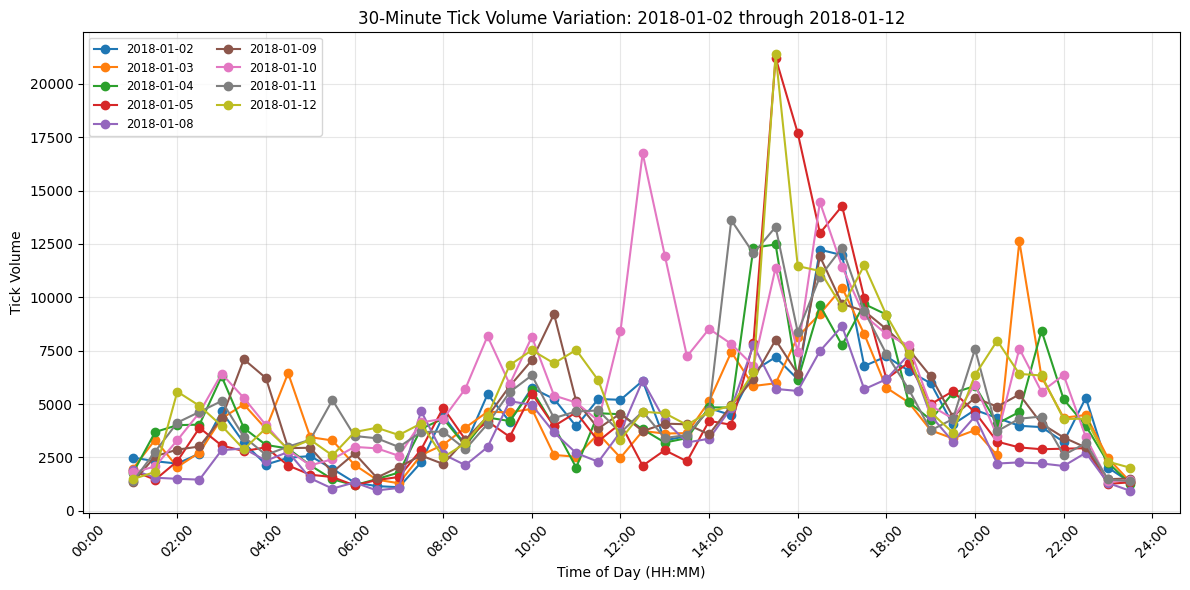

In [15]:
# 2) Ensure “datetime” is datetime dtype
volumeData['datetime'] = pd.to_datetime(volumeData['datetime'])

# 3) Define the range of dates: 2018-01-02 plus the next 10 calendar days (11 days total)
date_range = pd.date_range(start='2018-01-02', periods=11, freq='D')

# 4) Prepare the plot
plt.figure(figsize=(12, 6))

# 5) For each date in that range, filter and plot
for single_date in date_range:
    # Filter rows where the date portion matches single_date
    mask = volumeData['datetime'].dt.date == single_date.date()
    df_day = volumeData.loc[mask].copy()
    
    if df_day.empty:
        continue  # skip if no data for that date
    
    # Extract “time of day” as hours + minutes/60 for x-axis
    df_day['time_hours'] = (
        df_day['datetime'].dt.hour + df_day['datetime'].dt.minute / 60
    )
    
    # Plot tick_volume vs. time_hours
    # Label each line by its date in YYYY-MM-DD format
    plt.plot(
        df_day['time_hours'],
        df_day['tick_volume'],
        marker='o',
        linestyle='-',
        label=single_date.strftime('%Y-%m-%d')
    )

# 6) Format x-axis: ticks every 2 hours, with HH:MM labels
xticks = list(range(0, 25, 2))  # 0, 2, 4, ..., 24
xtick_labels = [f"{h:02d}:00" for h in xticks]
plt.xticks(xticks, xtick_labels, rotation=45)

plt.title('30-Minute Tick Volume Variation: 2018-01-02 through 2018-01-12')
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Tick Volume')
plt.grid(alpha=0.3)
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


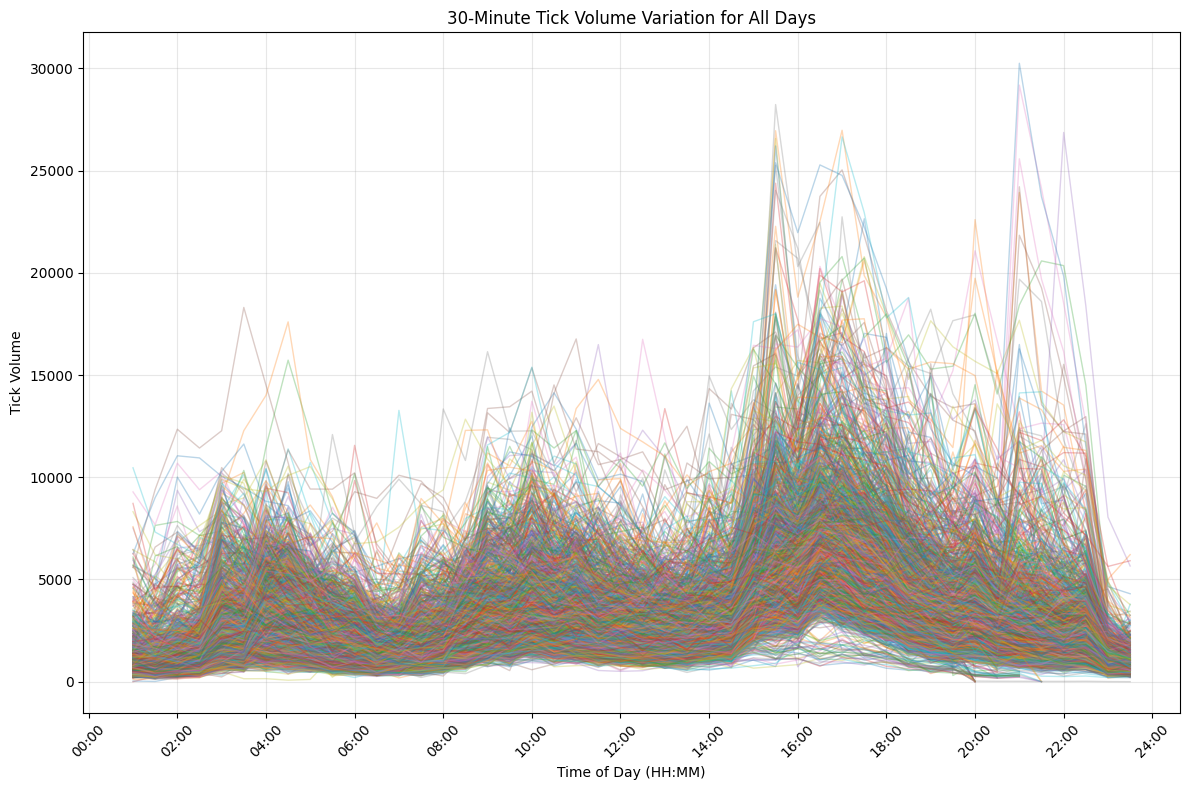

In [19]:
# 1) Load the full dataset (adjust path if needed)
volumeData = pd.read_csv('FinalDataset1.csv', parse_dates=['datetime'])

# 2) Ensure “datetime” is actually a datetime dtype
volumeData['datetime'] = pd.to_datetime(volumeData['datetime'])

# 3) Extract “date” and “time in hours” for plotting
volumeData['date'] = volumeData['datetime'].dt.date
volumeData['time_hours'] = (
    volumeData['datetime'].dt.hour + volumeData['datetime'].dt.minute / 60
)

# 4) Create the figure
plt.figure(figsize=(12, 8))

# 5) Plot each day’s 30-minute tick volume curve on the same axes
for single_date, group in volumeData.groupby('date'):
    # group is all rows from that date
    plt.plot(
        group['time_hours'],
        group['tick_volume'],
        alpha=0.3,               # semi‐transparent so overlapping lines are visible
        linewidth=1
    )

# 6) Format x-axis to show HH:MM ticks every 2 hours
xticks = list(range(0, 25, 2))  # 0, 2, 4, ..., 24
xtick_labels = [f"{h:02d}:00" for h in xticks]
plt.xticks(xticks, xtick_labels, rotation=45)

plt.title('30-Minute Tick Volume Variation for All Days')
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Tick Volume')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Intraday Seasonality (Average Volume by Time of Day)

TypeError: float() argument must be a string or a real number, not 'datetime.time'

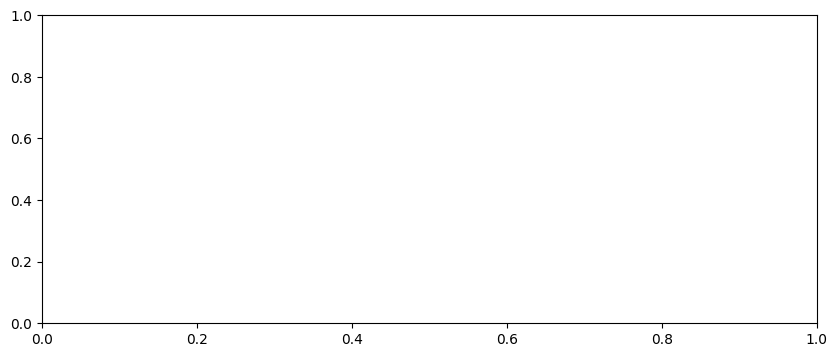

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Load and prepare the data (adjust path if needed)
volumeData = pd.read_csv('FinalDataset1.csv', parse_dates=['datetime'])
volumeData['datetime'] = pd.to_datetime(volumeData['datetime'])

# 2) Create a column that contains only the “time of day” (half‐hour) for grouping
#    e.g. datetime.time(1,0), datetime.time(1,30), …
volumeData['time_of_day'] = volumeData['datetime'].dt.time

# 3) Group by that “time_of_day” and compute the mean tick_volume
intraday_avg = (
    volumeData
    .groupby('time_of_day')['tick_volume']
    .mean()
    .sort_index()
)

# 4) Plot the result
plt.figure(figsize=(10, 4))
plt.plot(intraday_avg.index, intraday_avg.values, marker='o', linestyle='-')
plt.xticks(
    ticks=intraday_avg.index[::4],                    # every 4th tick => every 2 hours
    labels=[t.strftime('%H:%M') for t in intraday_avg.index[::4]],
    rotation=45
)
plt.title('Average Tick Volume by 30-Minute Slot (All Days)')
plt.xlabel('Time of Day (HH:MM)')
plt.ylabel('Mean Tick Volume')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Weekday Patterns (Average Volume by Day of Week)

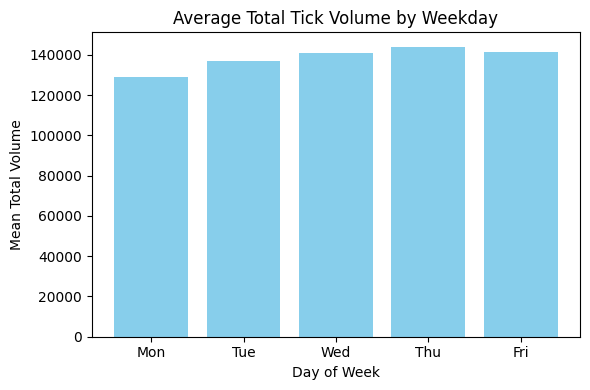

In [21]:
# 1) Create a “day_of_week” column: Monday=0, Tuesday=1, …, Sunday=6
volumeData['day_of_week'] = volumeData['datetime'].dt.dayofweek

# 2) Group by day_of_week, then compute mean daily volume.
#    If your data is 30-min tick data, you probably want total volume per calendar day—
#    so first sum “tick_volume” across each date.
volumeData['date_only'] = volumeData['datetime'].dt.date

# Sum tick_volume for each calendar date:
daily_volume = (
    volumeData
    .groupby('date_only')['tick_volume']
    .sum()
    .reset_index(name='total_volume')
)

# Add “day_of_week” back onto that daily_volume DataFrame
daily_volume['day_of_week'] = pd.to_datetime(daily_volume['date_only']).dt.dayofweek

# Compute average total_volume by day_of_week
weekday_avg = (
    daily_volume
    .groupby('day_of_week')['total_volume']
    .mean()
    .reindex([0,1,2,3,4], fill_value=0)  # only Monday–Friday
)

# 3) Plot
plt.figure(figsize=(6, 4))
plt.bar(
    x=['Mon','Tue','Wed','Thu','Fri'],
    height=weekday_avg.values,
    color='skyblue'
)
plt.title('Average Total Tick Volume by Weekday')
plt.ylabel('Mean Total Volume')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()


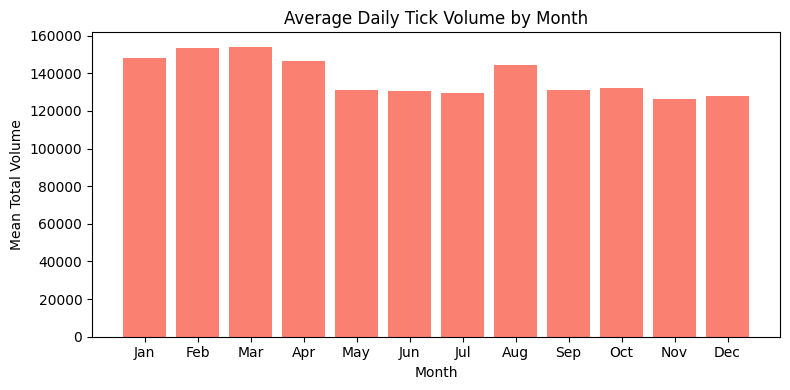

In [22]:
# 1) Make a “month” column
volumeData['month'] = volumeData['datetime'].dt.month  # 1=Jan, 2=Feb, … 12=Dec

# 2) Sum daily volume (as before), then group by month
#    (Alternatively, you could sum directly across all rows where datetime.month == X,
#     but it’s more robust to go “sum by date” then “group those dates by month.”)
daily_vol = (
    volumeData
    .groupby('date_only')['tick_volume']
    .sum()
    .reset_index(name='total_volume')
)
daily_vol['month'] = pd.to_datetime(daily_vol['date_only']).dt.month

monthly_avg = (
    daily_vol
    .groupby('month')['total_volume']
    .mean()
    .reindex(range(1,13), fill_value=0)  # ensures Jan→Dec in order
)

# 3) Plot
plt.figure(figsize=(8, 4))
plt.bar(
    x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    height=monthly_avg.values,
    color='salmon'
)
plt.title('Average Daily Tick Volume by Month')
plt.ylabel('Mean Total Volume')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


Volume vs. Price Movement

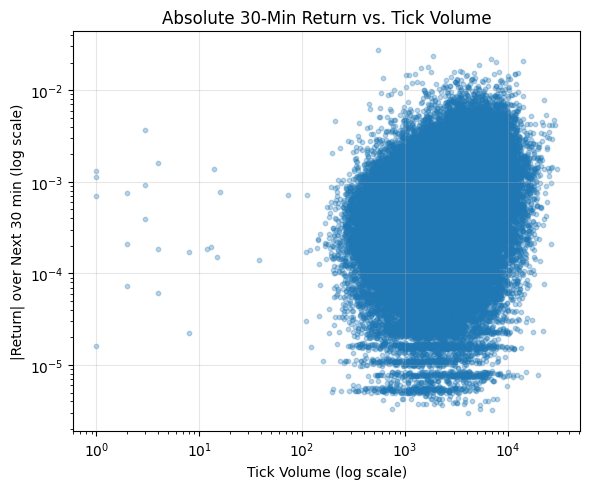

In [23]:
# 1) Create a price column. Suppose you have “close” in volumeData.
#    If not already present, adjust accordingly.
#    Here I assume volumeData has a “close” column.

# 2) Compute 30-minute forward return (log return or simple return)
volumeData = volumeData.sort_values('datetime')
volumeData['return_30m'] = volumeData['close'].pct_change(periods=1).shift(-1)
#    If your data is strictly 30-minutes apart, then .pct_change(periods=1) is the next bar.
#    If there are gaps, consider using .shift(-1) after pct_change(1). Adjust as needed.

# 3) Now we can scatter‐plot tick_volume vs. absolute return_30m
subset = volumeData.dropna(subset=['tick_volume', 'return_30m']).copy()

plt.figure(figsize=(6, 5))
plt.scatter(
    subset['tick_volume'],
    subset['return_30m'].abs(),  # absolute return magnitude
    alpha=0.3,
    s=10
)
plt.xscale('log')   # volumes tend to span several orders of magnitude
plt.yscale('log')   # returns also are skewed
plt.title('Absolute 30-Min Return vs. Tick Volume')
plt.xlabel('Tick Volume (log scale)')
plt.ylabel('|Return| over Next 30 min (log scale)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Intraday Heatmap: Volume by Hour and Day

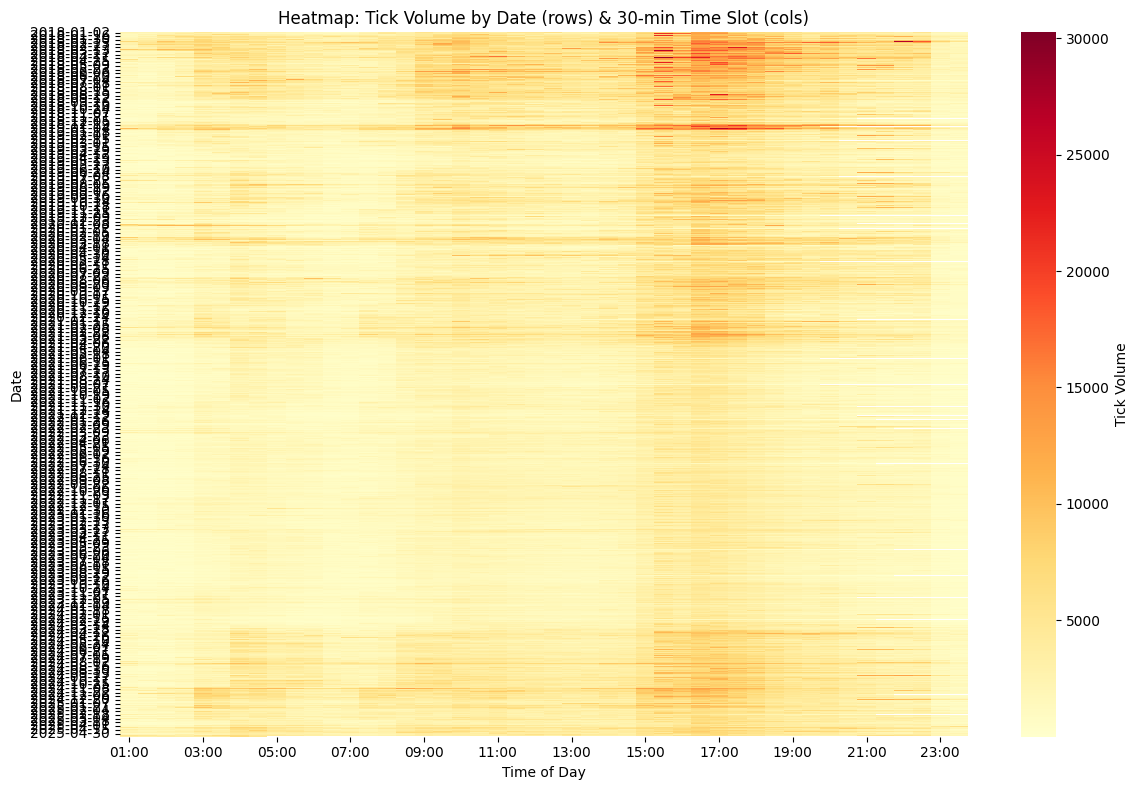

In [24]:
import pandas as pd
import seaborn as sns  # only for the heatmap; if you prefer pure matplotlib, you can but seaborn is easiest here
import matplotlib.pyplot as plt

# 1) Prepare columns
volumeData['date_only'] = volumeData['datetime'].dt.date
volumeData['time_slot'] = volumeData['datetime'].dt.strftime('%H:%M')

# 2) Pivot so that each row is a date, each column is a time slot
pivot = volumeData.pivot_table(
    index='date_only',
    columns='time_slot',
    values='tick_volume',
    aggfunc='sum'  # if multiple ticks in the same time-slot, sum them
)

# 3) (Optional) Sort columns by actual chronological order
time_order = sorted(pivot.columns, key=lambda t: pd.to_datetime(t, format='%H:%M'))
pivot = pivot[time_order]

# 4) Plot heatmap (you can pick a subset of dates if there are too many)
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot,
    cmap='YlOrRd',
    cbar_kws={'label': 'Tick Volume'},
    xticklabels=4,  # show every 4th time‐slot label for readability
    yticklabels=10  # show every 10th date label
)
plt.title('Heatmap: Tick Volume by Date (rows) & 30-min Time Slot (cols)')
plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()
